# GRIP : The Saprk Foundation

# Data Science And Buisness Analytics Intern

# Author : Atharv Bhilare

# Task 1 : Prediction Using Supervised ML 

In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables. This can be solved by using simple linear regression.

Importing required libralies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

Data Preprocessing

In [8]:
data.shape
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

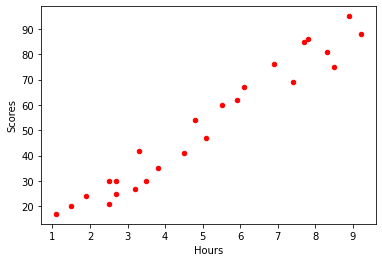

In [19]:
data.plot(kind="scatter",x="Hours",y="Scores",color="r")
plt.show()

In [20]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [21]:
hours=data["Hours"]
scores=data["Scores"]

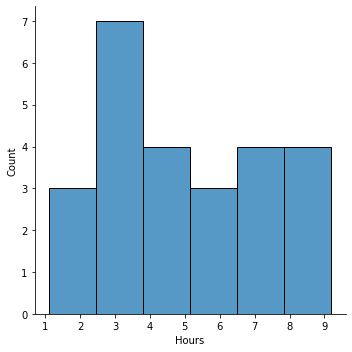

In [25]:
sns.displot(hours)

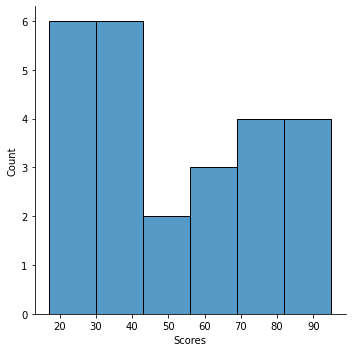

In [26]:
sns.displot(scores)

# Linear Regression

In [31]:
#Splitting data in x and y
X=data.drop("Scores",axis=1)
y=data["Scores"]

In [56]:
#Now splitting data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

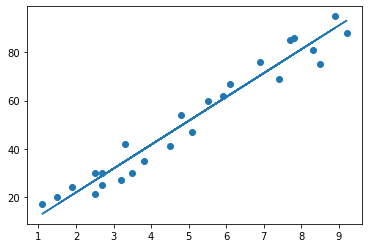

In [57]:
a=lr.coef_
c=lr.intercept_
line=a*X+c
plt.scatter(X,y)
plt.plot(X, line)
plt.show()

In [58]:
y_pred=lr.predict(X_test)
df=pd.DataFrame({"Actual":y_test,"Predict":y_pred})
print(df)
print("Accuracy:",lr.score(X,y)*100)

    Actual    Predict
5       20  16.884145
2       27  33.732261
19      69  75.357018
16      30  26.794801
11      62  60.491033
Accuracy: 95.26947647057274


What would be the predicted score if a student studies 9.25 hours/day?

In [41]:
h=9.52
b=lr.predict([[h]])
print(f"If a student studied for {h} hours/day he/she will score {b} % in exam.")

If a student studied for 9.52 hours/day he/she will score [96.36760974] % in exam.


# Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356
